<a href="https://colab.research.google.com/github/HarshAhalpara-001/Complete_MachineLearning/blob/main/Supervise_Learning/Support%20Vector%20Machine/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4,n_samples=1000, random_state=0)
X=X[:, [1, 2]] # after scatterplot seems more relevance

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

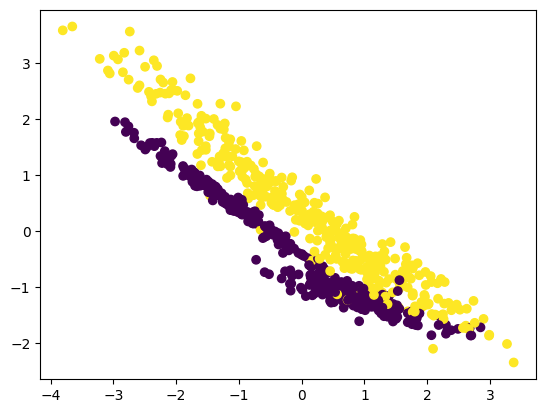

In [62]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
# plt.show()
# plt.scatter(X_train[:,1],X_train[:,2],c=y_train)
# plt.show()
# plt.scatter(X_train[:,2],X_train[:,3],c=y_train)
# plt.show()

In [63]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear'))
])
# X_train=X_train[:, [1, 2]]
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

0.964
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       119
           1       0.95      0.98      0.97       131

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



Text(50.722222222222214, 0.5, 'Truth')

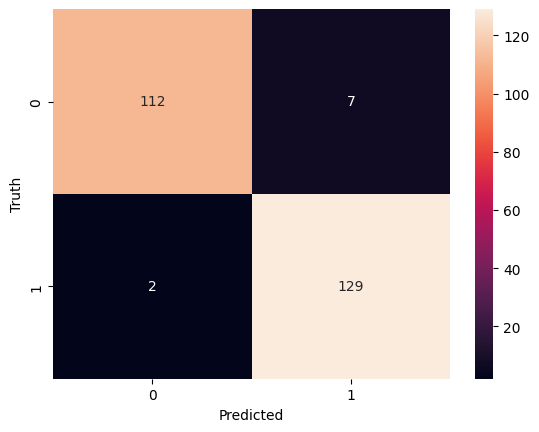

In [64]:
print(accuracy_score(y_test,model.predict(X_test)))
print(classification_report(y_test,model.predict(X_test)))
cm=confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Visualization in Test dataset.

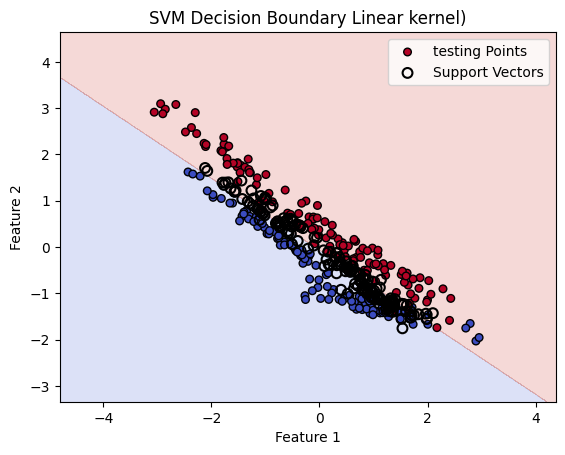

In [70]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k', label='testing Points')
svc = model.named_steps['svc']
    # Plot the support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
                s=50, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'SVM Decision Boundary Linear kernel)')
plt.legend()
plt.show()